In [1]:
# 1. Clone the project from GitHub
!git clone https://github.com/MELAI-1/downscaling-cgan.git

# 2. Move to the project's root directory
%cd downscaling-cgan


Cloning into 'downscaling-cgan'...
remote: Enumerating objects: 4009, done.
remote: Counting objects: 100% (440/440), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 4009 (delta 371), reused 300 (delta 300), pack-reused 3569 (from 4)
Receiving objects: 100% (4009/4009), 126.08 MiB | 13.18 MiB/s, done.
Resolving deltas: 100% (2844/2844), done.
Updating files: 100% (319/319), done.
/content/downscaling-cgan


In [2]:
import os

# # Only needed for tensorflow versions greater than 2.16.0
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import tf_keras
print(tf_keras.__version__)

2.19.0


In [3]:
# 3. Install dependencies (very important for Cartopy, GCS, and Regridding)
!pip install cartopy gcsfs zarr fsspec  netCDF4 xarray cftime timezonefinder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 115.5 MB/s eta 0:00:00


In [4]:
# !pip install -q tf-keras

# import os
# os.environ["TF_USE_LEGACY_KERAS"] = "1"

# import tensorflow as tf
# import tf_keras as keras
# print(f"Keras Version: {keras.__version__}")

In [5]:
# 4. Google Cloud authentication (required for NeuralGCM and your buckets)
from google.colab import auth
auth.authenticate_user()

# 5. Add the current directory to the Python PATH to import your modules (.py files)
import sys
import os
sys.path.append(os.getcwd())

print(" Setup complete. Ready to import your modules!")


 Setup complete. Ready to import your modules!


In [6]:
import sys
from unittest.mock import MagicMock

# Create a fake xesmf module so the scripts stop crashing
mock_xe = MagicMock()
sys.modules["xesmf"] = mock_xe

print("xeSMF has been mocked. You can now import your scripts without errors.")

xeSMF has been mocked. You can now import your scripts without errors.


In [7]:
import os
# Check where you are currently
print("Current Directory:", os.getcwd())

# Move to the project root
os.chdir('/content/downscaling-cgan/')



Current Directory: /content/downscaling-cgan


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os

# # Only needed for tensorflow versions greater than 2.16.0
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import sys
# Adjusted path to point to the scripts folder in the cloned repo
sys.path.insert(1, os.path.join(os.getcwd(), "scripts"))

import forecast_gfs

Setting up GPU
the start hour is:0
6
{'EVAL': {'add_postprocessing_noise': True, 'avg_pooling': True, 'max_pooling': True, 'num_batches': 256, 'postprocessing_noise_factor': '1e-3'}, 'architecture': 'forceconv', 'disable_tf32': False, 'discriminator': {'filters_disc': 256, 'learning_rate_disc': 1e-05, 'normalisation': None}, 'downsample': False, 'downscaling_factor': 1, 'downscaling_steps': [1], 'generator': {'filters_gen': 64, 'latent_variables': 1, 'learning_rate_gen': 1e-05, 'noise_channels': 4, 'normalisation': None, 'output_activation': 'softplus'}, 'gpu_mem_incr': True, 'log_folder': '/home/melvin_aims_ac_za/logs/cgan', 'mode': 'GAN', 'padding': 'reflect', 'problem_type': 'normal', 'train': {'CL_type': 'ensmeanMSE', 'batch_size': 2, 'content_loss_weight': 1000.0, 'crop_size': 256, 'ensemble_size': 8, 'img_chunk_width': 256, 'kl_weight': 1e-08, 'num_epochs': 5, 'num_samples': 40000, 'rotate': False, 'steps_per_checkpoint': 2000, 'training_range': ['200101', '201501'], 'training_ra

In [10]:
import importlib
importlib.reload(forecast_gfs)

# Defining the absolute base path where the data is located
input_data_path = '/content/drive/MyDrive/AIMS_project_data/NGCM/'

# Run the forecast with the explicit input folder path
forecast_gfs.make_fcst()

Setting up GPU
the start hour is:0
6
{'EVAL': {'add_postprocessing_noise': True, 'avg_pooling': True, 'max_pooling': True, 'num_batches': 256, 'postprocessing_noise_factor': '1e-3'}, 'architecture': 'forceconv', 'disable_tf32': False, 'discriminator': {'filters_disc': 256, 'learning_rate_disc': 1e-05, 'normalisation': None}, 'downsample': False, 'downscaling_factor': 1, 'downscaling_steps': [1], 'generator': {'filters_gen': 64, 'latent_variables': 1, 'learning_rate_gen': 1e-05, 'noise_channels': 4, 'normalisation': None, 'output_activation': 'softplus'}, 'gpu_mem_incr': True, 'log_folder': '/home/melvin_aims_ac_za/logs/cgan', 'mode': 'GAN', 'padding': 'reflect', 'problem_type': 'normal', 'train': {'CL_type': 'ensmeanMSE', 'batch_size': 2, 'content_loss_weight': 1000.0, 'crop_size': 256, 'ensemble_size': 8, 'img_chunk_width': 256, 'kl_weight': 1e-08, 'num_epochs': 5, 'num_samples': 40000, 'rotate': False, 'steps_per_checkpoint': 2000, 'training_range': ['200101', '201501'], 'training_ra

# Sanity check

In [32]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
dates = np.asarray(forecast_gfs.dates,dtype='datetime64[D]')
d = dates[0].astype(object)
path_to_file = forecast_gfs.output_folder+f"test/{d.year}/GAN_{d.year}{d.month:02}{d.day:02}.nc"

ds = xr.open_dataset(path_to_file)


fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
c = plt.pcolormesh(ds.longitude.values, ds.latitude.values, np.squeeze(ds.precipitation.mean(['valid_time','member']).values*24),
                   transform=ccrs.PlateCarree(), cmap='YlGnBu',vmin=1,vmax=60)

cb = plt.colorbar(c, fraction=0.02)

#PLOT CARTOPY

precip shape    : (50, 4, 384, 352)  (members, times, lat, lon)
latitude  shape : (384,)
longitude shape : (352,)
valid_times     : [ 0.  6. 12. 18.]


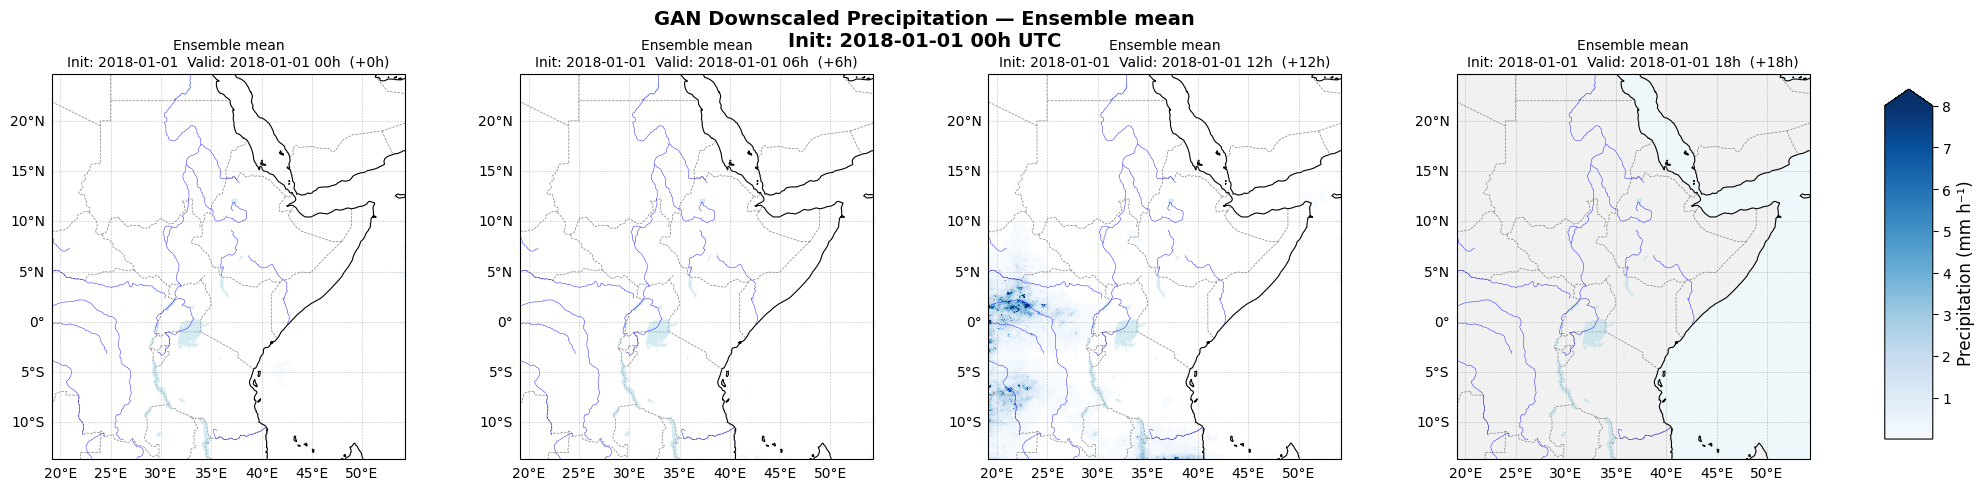

Figure sauvegardée.


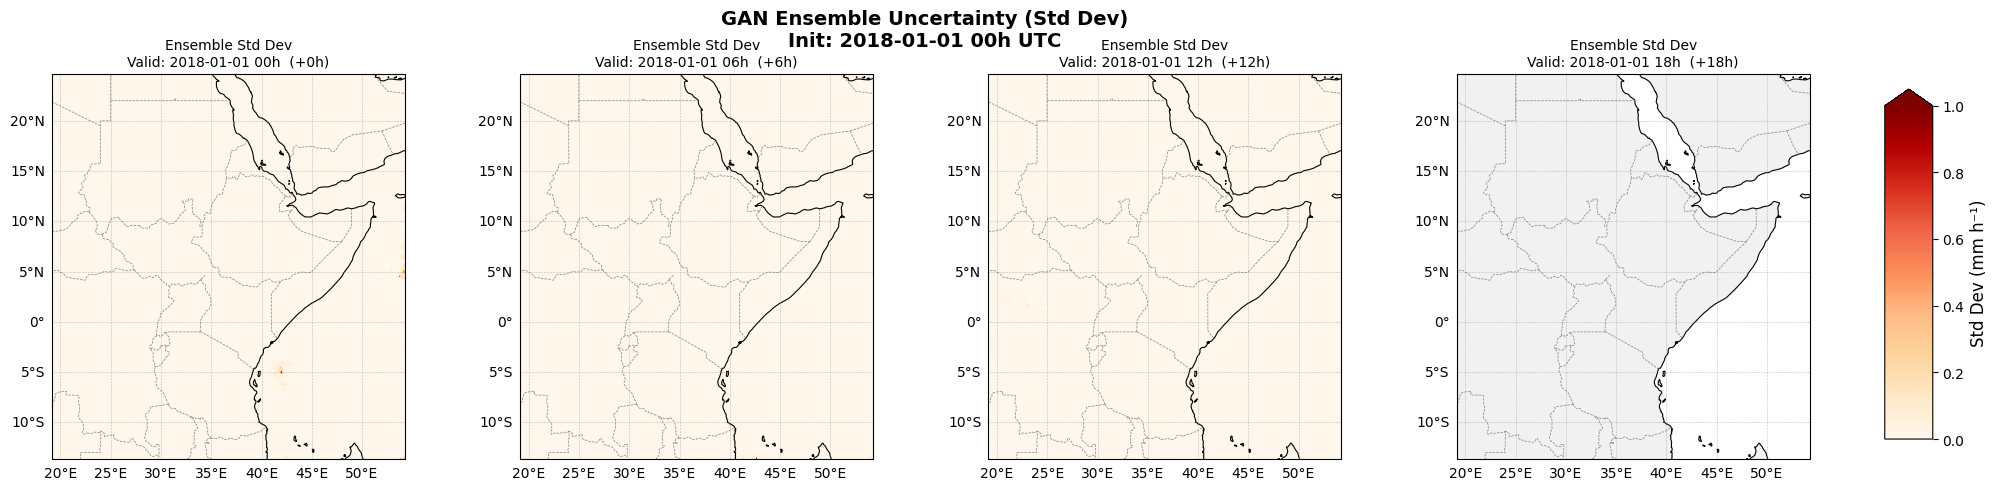

Figure écart-type sauvegardée.


In [30]:
"""
Script de visualisation Cartopy pour les sorties GAN (.npy)
===========================================================
Fichiers attendus (produits par forecast_gfs_npy.py) :
  - precipitation_YYYYMMDD.npy  → (members, valid_times, lat, lon)
  - latitude.npy                → (n_lat,)
  - longitude.npy               → (n_lon,)
  - valid_times_YYYYMMDD.npy    → (n_valid_times,)  heures depuis init

Usage :
  python plot_forecast.py
  ou directement dans un notebook Colab
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta

# =============================================================================
# CONFIGURATION — modifiez ces paramètres selon vos besoins
# =============================================================================
OUTPUT_FOLDER = "/content/output_test/test/2018"
DATE_STR      = "20180101"       # date d'initialisation YYYYMMDD
INIT_DATE     = datetime(2018, 1, 1)

# Quel membre afficher ? (-1 = moyenne d'ensemble)
MEMBER        = -1               # -1 → moyenne, 0..N-1 → membre spécifique

# Afficher tous les pas de temps ou un seul ?
SINGLE_TIME   = None             # None → tous les pas de temps
                                 # int  → index du pas de temps (ex: 0=00h, 1=06h)

# Colormap et limites
CMAP          = "Blues"
VMIN          = 0.0
VMAX          = 8           # mm/h — ajustez selon vos données

# =============================================================================
# CHARGEMENT DES DONNÉES
# =============================================================================
precip      = np.load(os.path.join(OUTPUT_FOLDER, f"precipitation_{DATE_STR}.npy"))
latitude    = np.load(os.path.join(OUTPUT_FOLDER, "latitude.npy"))
longitude   = np.load(os.path.join(OUTPUT_FOLDER, "longitude.npy"))
valid_times = np.load(os.path.join(OUTPUT_FOLDER, f"valid_times_{DATE_STR}.npy"))

print(f"precip shape    : {precip.shape}  (members, times, lat, lon)")
print(f"latitude  shape : {latitude.shape}")
print(f"longitude shape : {longitude.shape}")
print(f"valid_times     : {valid_times}")

# Sélection du membre
if MEMBER == -1:
    data_to_plot = precip.mean(axis=0)          # (times, lat, lon)
    member_label = "Ensemble mean"
else:
    data_to_plot = precip[MEMBER]               # (times, lat, lon)
    member_label = f"Member {MEMBER + 1}"

# Sélection des pas de temps à afficher
if SINGLE_TIME is not None:
    time_indices = [SINGLE_TIME]
else:
    time_indices = list(range(len(valid_times)))

# =============================================================================
# COLORMAP PRÉCIPITATION
# Transparence pour les valeurs proches de 0
# =============================================================================
cmap = plt.get_cmap(CMAP).copy()
cmap.set_under("white")   # valeurs < VMIN → blanc (pas de précip)

# =============================================================================
# PLOT
# =============================================================================
n_plots = len(time_indices)
ncols   = min(4, n_plots)
nrows   = (n_plots + ncols - 1) // ncols

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(6 * ncols, 5 * nrows),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

# Aplatir les axes pour itérer facilement
if n_plots == 1:
    axes = np.array([[axes]])
axes_flat = axes.flatten()

for plot_idx, time_idx in enumerate(time_indices):

    ax          = axes_flat[plot_idx]
    lead_hour   = int(valid_times[time_idx])
    valid_dt    = INIT_DATE + timedelta(hours=lead_hour)
    field       = data_to_plot[time_idx]         # (lat, lon)

    # Carte de base
    ax.set_extent(
        [longitude.min(), longitude.max(), latitude.min(), latitude.max()],
        crs=ccrs.PlateCarree()
    )
    ax.add_feature(cfeature.COASTLINE,   linewidth=0.8, edgecolor="black")
    ax.add_feature(cfeature.BORDERS,     linewidth=0.5, edgecolor="gray",
                   linestyle="--")
    ax.add_feature(cfeature.LAND,        facecolor="lightgray", alpha=0.3)
    ax.add_feature(cfeature.OCEAN,       facecolor="lightblue", alpha=0.2)
    ax.add_feature(cfeature.LAKES,       facecolor="lightblue", alpha=0.5)
    ax.add_feature(cfeature.RIVERS,      edgecolor="blue",      linewidth=0.3)

    # Grille
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color="gray",
                      alpha=0.5, linestyle="--")
    gl.top_labels   = False
    gl.right_labels = False

    # Précipitation
    im = ax.pcolormesh(
        longitude, latitude, field,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=max(VMIN, 0.01),   # évite d'afficher les 0 en bleu
        vmax=VMAX,
        shading="auto"
    )

    ax.set_title(
        f"{member_label}\n"
        f"Init: {INIT_DATE.strftime('%Y-%m-%d')}  "
        f"Valid: {valid_dt.strftime('%Y-%m-%d %Hh')}  "
        f"(+{lead_hour}h)",
        fontsize=10
    )

# Masquer les axes vides si n_plots < nrows*ncols
for ax in axes_flat[n_plots:]:
    ax.set_visible(False)

# Colorbar commune
fig.subplots_adjust(right=0.88, hspace=0.4, wspace=0.15)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
cbar    = fig.colorbar(im, cax=cbar_ax, extend="max")
cbar.set_label("Precipitation (mm h⁻¹)", fontsize=12)

fig.suptitle(
    f"GAN Downscaled Precipitation — {member_label}\n"
    f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC",
    fontsize=14, fontweight="bold", y=1.01
)

plt.savefig(
    os.path.join(OUTPUT_FOLDER, f"GAN_precip_{DATE_STR}_{member_label.replace(' ', '_')}.png"),
    dpi=150, bbox_inches="tight"
)
plt.show()
print("Figure sauvegardée.")


# =============================================================================
# BONUS : plot de l'incertitude d'ensemble (écart-type)
# =============================================================================
if precip.shape[0] > 1:

    fig2, axes2 = plt.subplots(
        nrows, ncols,
        figsize=(6 * ncols, 5 * nrows),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )
    if n_plots == 1:
        axes2 = np.array([[axes2]])
    axes2_flat = axes2.flatten()

    std_data = precip.std(axis=0)   # (times, lat, lon)

    for plot_idx, time_idx in enumerate(time_indices):

        ax        = axes2_flat[plot_idx]
        lead_hour = int(valid_times[time_idx])
        valid_dt  = INIT_DATE + timedelta(hours=lead_hour)
        field_std = std_data[time_idx]

        ax.set_extent(
            [longitude.min(), longitude.max(), latitude.min(), latitude.max()],
            crs=ccrs.PlateCarree()
        )
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor="black")
        ax.add_feature(cfeature.BORDERS,   linewidth=0.5, edgecolor="gray",
                       linestyle="--")
        ax.add_feature(cfeature.LAND,      facecolor="lightgray", alpha=0.3)

        gl = ax.gridlines(draw_labels=True, linewidth=0.4, color="gray",
                          alpha=0.5, linestyle="--")
        gl.top_labels   = False
        gl.right_labels = False

        im2 = ax.pcolormesh(
            longitude, latitude, field_std,
            transform=ccrs.PlateCarree(),
            cmap="OrRd",
            vmin=0,
            vmax=field_std.max() if field_std.max() > 0 else 1,
            shading="auto"
        )
        ax.set_title(
            f"Ensemble Std Dev\n"
            f"Valid: {valid_dt.strftime('%Y-%m-%d %Hh')}  (+{lead_hour}h)",
            fontsize=10
        )

    for ax in axes2_flat[n_plots:]:
        ax.set_visible(False)

    fig2.subplots_adjust(right=0.88, hspace=0.4, wspace=0.15)
    cbar_ax2 = fig2.add_axes([0.90, 0.15, 0.02, 0.7])
    cbar2    = fig2.colorbar(im2, cax=cbar_ax2, extend="max")
    cbar2.set_label("Std Dev (mm h⁻¹)", fontsize=12)

    fig2.suptitle(
        f"GAN Ensemble Uncertainty (Std Dev)\n"
        f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC",
        fontsize=14, fontweight="bold", y=1.01
    )

    plt.savefig(
        os.path.join(OUTPUT_FOLDER, f"GAN_std_{DATE_STR}.png"),
        dpi=150, bbox_inches="tight"
    )
    plt.show()
    print("Figure écart-type sauvegardée.")

# Test 1

In [29]:

# """
# Cartopy visualization script for GAN forecast outputs (.npy)
# =============================================================
# Expected files (produced by forecast_gfs_save.py):
#   - precipitation_YYYYMMDD.npy  -> (members, valid_times, lat, lon)
#   - latitude.npy                -> (n_lat,)
#   - longitude.npy               -> (n_lon,)
#   - valid_times_YYYYMMDD.npy    -> (n_valid_times,)  lead hours from init

# Usage:
#   python plot_forecast.py
#   or directly in a Colab notebook
# """

# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from datetime import datetime, timedelta

# # =============================================================================
# # CONFIGURATION — edit these parameters as needed
# # =============================================================================
# OUTPUT_FOLDER = "/content/output_test/test/2018"
# DATE_STR      = "20180101"
# INIT_DATE     = datetime(2018, 1, 1)

# MEMBER        = -1      # -1 -> ensemble mean, 0..N-1 -> specific member
# SINGLE_TIME   = None    # None -> average over all time steps (like reference code)
#                         # int  -> single time step (e.g. 0=00h, 1=06h)

# CMAP  = "YlGnBu"
# VMIN  = 1.0    # mm/day — LogNorm, values < 1 -> white (no rain)
# VMAX  = 60.0   # mm/day

# # =============================================================================
# # LOAD DATA
# # =============================================================================
# precip      = np.load(os.path.join(OUTPUT_FOLDER, f"precipitation_{DATE_STR}.npy"))
# latitude    = np.load(os.path.join(OUTPUT_FOLDER, "latitude.npy"))
# longitude   = np.load(os.path.join(OUTPUT_FOLDER, "longitude.npy"))
# valid_times = np.load(os.path.join(OUTPUT_FOLDER, f"valid_times_{DATE_STR}.npy"))

# print(f"precip shape : {precip.shape}  (members, times, lat, lon)")
# print(f"precip raw   : min={precip.min():.4f}, max={precip.max():.4f} mm/h")

# # =============================================================================
# # CONVERSION mm/h -> mm/day (x24) — matches reference code
# # =============================================================================
# precip_daily = precip * 24   # (members, times, lat, lon) in mm/day
# print(f"precip daily : min={precip_daily.min():.4f}, max={precip_daily.max():.4f} mm/day")

# # # =============================================================================
# # # PLOT 1 — REFERENCE STYLE
# # # Mean over members AND time steps -> single map (matches reference code)
# # # =============================================================================
# # field_mean = precip_daily.mean(axis=0).mean(axis=0)   # (lat, lon)
# # print(f"field_mean   : min={field_mean.min():.4f}, max={field_mean.max():.4f} mm/day")

# # fig = plt.figure(figsize=(14, 8))
# # ax  = plt.axes(projection=ccrs.Robinson())

# # ax.coastlines()
# # ax.add_feature(cfeature.BORDERS,   linewidth=1)
# # ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# # c = ax.pcolormesh(
# #     longitude, latitude, field_mean,
# #     transform=ccrs.PlateCarree(),
# #     cmap=CMAP,
# #     norm=LogNorm(vmin=VMIN, vmax=VMAX),
# #     shading="auto"
# # )
# # cb = plt.colorbar(c, fraction=0.02)
# # cb.set_label("Precipitation (mm day⁻¹)", fontsize=11)

# # ax.set_title(
# #     f"GAN Downscaled Precipitation — Ensemble & Time Mean\n"
# #     f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC  "
# #     f"({precip.shape[0]} members, {precip.shape[1]} time steps)",
# #     fontsize=13
# # )
# # plt.savefig(
# #     os.path.join(OUTPUT_FOLDER, f"GAN_mean_{DATE_STR}.png"),
# #     dpi=150, bbox_inches="tight"
# # )
# # plt.show()
# # print("Mean map saved.")


# # =============================================================================
# # PLOT 2 — ONE PANEL PER TIME STEP (ensemble mean only)
# # =============================================================================
# if SINGLE_TIME is not None:
#     time_indices = [SINGLE_TIME]
# else:
#     time_indices = list(range(len(valid_times)))

# if MEMBER == -1:
#     data_to_plot = precip_daily.mean(axis=0)   # (times, lat, lon)
#     member_label = "Ensemble mean"
# else:
#     data_to_plot = precip_daily[MEMBER]        # (times, lat, lon)
#     member_label = f"Member {MEMBER + 1}"

# n_plots = len(time_indices)
# ncols   = min(4, n_plots)
# nrows   = (n_plots + ncols - 1) // ncols

# fig2, axes2 = plt.subplots(
#     nrows, ncols,
#     figsize=(6 * ncols, 5 * nrows),
#     subplot_kw={"projection": ccrs.Robinson()}
# )
# if n_plots == 1:
#     axes2 = np.array([[axes2]])
# axes2_flat = axes2.flatten()

# for plot_idx, time_idx in enumerate(time_indices):

#     ax        = axes2_flat[plot_idx]
#     lead_hour = int(valid_times[time_idx])
#     valid_dt  = INIT_DATE + timedelta(hours=lead_hour)
#     field     = data_to_plot[time_idx]   # (lat, lon)

#     ax.coastlines()
#     ax.add_feature(cfeature.BORDERS, linewidth=0.8)
#     ax.add_feature(cfeature.LAKES,   facecolor="lightblue", alpha=0.5)
#     ax.add_feature(cfeature.RIVERS,  edgecolor="blue", linewidth=0.3)

#     c2 = ax.pcolormesh(
#         longitude, latitude, field,
#         transform=ccrs.PlateCarree(),
#         cmap=CMAP,
#         norm=LogNorm(vmin=VMIN, vmax=VMAX),
#         shading="auto"
#     )
#     ax.set_title(
#         f"{member_label}\n"
#         f"Valid: {valid_dt.strftime('%Y-%m-%d %Hh')}  (+{lead_hour}h)",
#         fontsize=10
#     )

# for ax in axes2_flat[n_plots:]:
#     ax.set_visible(False)

# fig2.subplots_adjust(right=0.88, hspace=0.4, wspace=0.1)
# cbar_ax = fig2.add_axes([0.90, 0.15, 0.02, 0.7])
# cb2     = fig2.colorbar(c2, cax=cbar_ax, extend="max")
# cb2.set_label("Precipitation (mm day⁻¹)", fontsize=11)
# fig2.suptitle(
#     f"GAN Downscaled Precipitation — {member_label}\n"
#     f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC",
#     fontsize=14, fontweight="bold", y=1.01
# )
# plt.savefig(
#     os.path.join(OUTPUT_FOLDER,
#                  f"GAN_timesteps_{DATE_STR}_{member_label.replace(' ', '_')}.png"),
#     dpi=150, bbox_inches="tight"
# )
# plt.show()
# print("Time steps figure saved.")


# # =============================================================================
# # PLOT 3 — ENSEMBLE UNCERTAINTY (STD DEV) in mm/day
# # =============================================================================
# if precip.shape[0] > 1:

#     std_data = precip_daily.std(axis=0)   # (times, lat, lon)

#     nonzero_std = std_data[std_data > 0]
#     vmax_std    = float(np.nanpercentile(nonzero_std, 99)) if len(nonzero_std) > 0 else 1.0
#     print(f"\nvmax_std (p99) : {vmax_std:.4f} mm/day")

#     fig3, axes3 = plt.subplots(
#         nrows, ncols,
#         figsize=(6 * ncols, 5 * nrows),
#         subplot_kw={"projection": ccrs.Robinson()}
#     )
#     if n_plots == 1:
#         axes3 = np.array([[axes3]])
#     axes3_flat = axes3.flatten()

#     for plot_idx, time_idx in enumerate(time_indices):

#         ax        = axes3_flat[plot_idx]
#         lead_hour = int(valid_times[time_idx])
#         valid_dt  = INIT_DATE + timedelta(hours=lead_hour)
#         field_std = std_data[time_idx]

#         ax.coastlines()
#         ax.add_feature(cfeature.BORDERS, linewidth=0.8)
#         ax.add_feature(cfeature.LAKES,   facecolor="lightblue", alpha=0.5)

#         c3 = ax.pcolormesh(
#             longitude, latitude, field_std,
#             transform=ccrs.PlateCarree(),
#             cmap="OrRd",
#             vmin=0,
#             vmax=vmax_std,
#             shading="auto"
#         )
#         ax.set_title(
#             f"Ensemble Std Dev\n"
#             f"Valid: {valid_dt.strftime('%Y-%m-%d %Hh')}  (+{lead_hour}h)",
#             fontsize=10
#         )

#     for ax in axes3_flat[n_plots:]:
#         ax.set_visible(False)

#     fig3.subplots_adjust(right=0.88, hspace=0.4, wspace=0.1)
#     cbar_ax3 = fig3.add_axes([0.90, 0.15, 0.02, 0.7])
#     cb3      = fig3.colorbar(c3, cax=cbar_ax3, extend="max")
#     cb3.set_label("Std Dev (mm day⁻¹)", fontsize=11)
#     fig3.suptitle(
#         f"GAN Ensemble Uncertainty (Std Dev)\n"
#         f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC",
#         fontsize=14, fontweight="bold", y=1.01
#     )
#     plt.savefig(
#         os.path.join(OUTPUT_FOLDER, f"GAN_std_{DATE_STR}.png"),
#         dpi=150, bbox_inches="tight"
#     )
#     plt.show()
#     print("Std Dev figure saved.")


# Test 2

precip shape : (50, 4, 384, 352) (members, times, lat, lon)
precip raw   : min=0.0000, max=10206.1045 mm/h
precip daily : min=0.0000, max=10206.1045 mm/day
VMAX used    : 20.00 mm/day


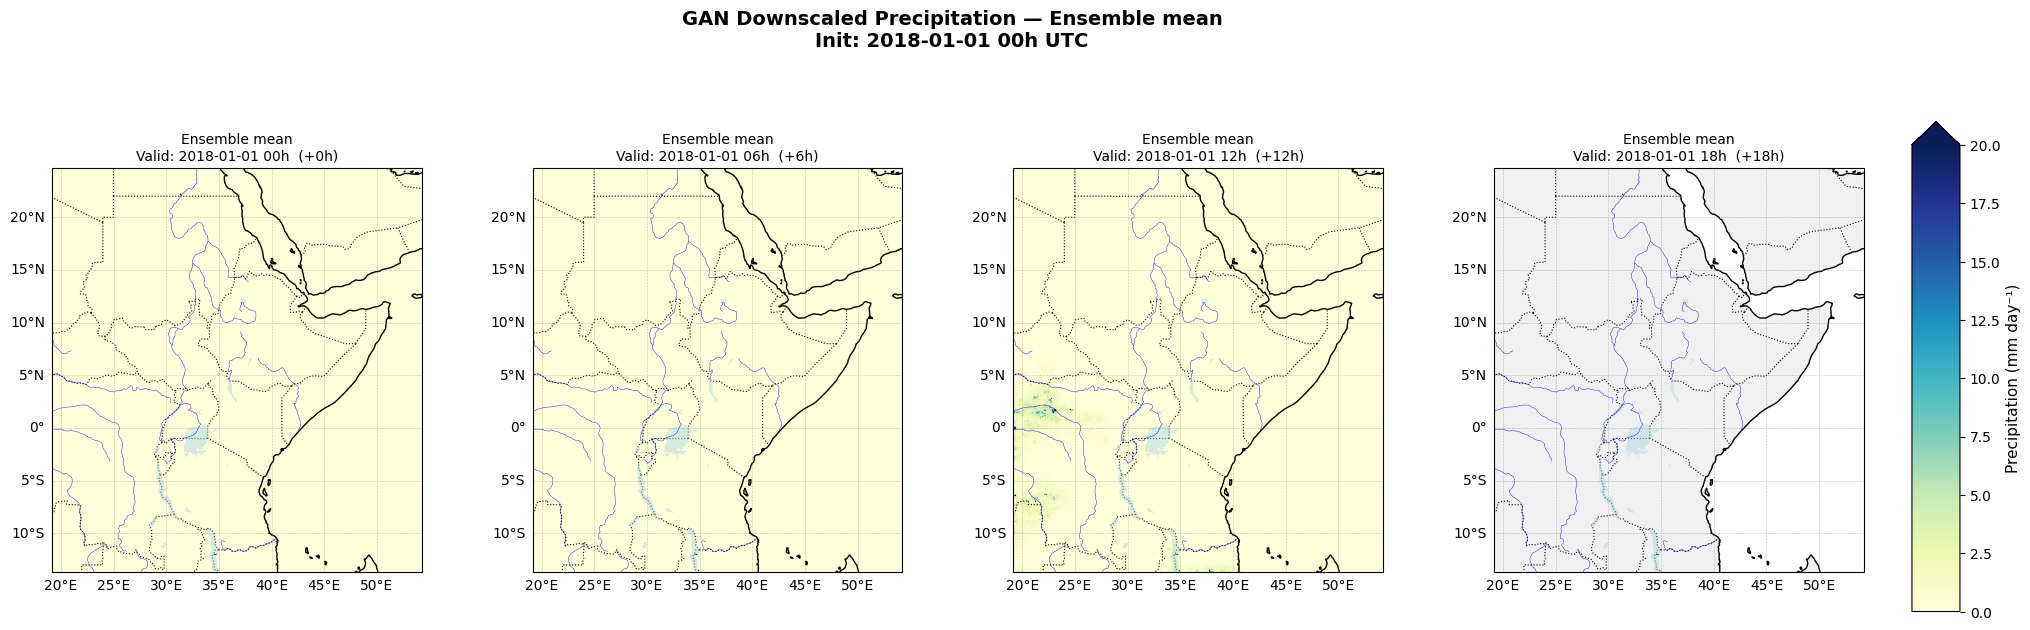

Time steps figure saved.

vmax_std (p99) : 3.1308 mm/day


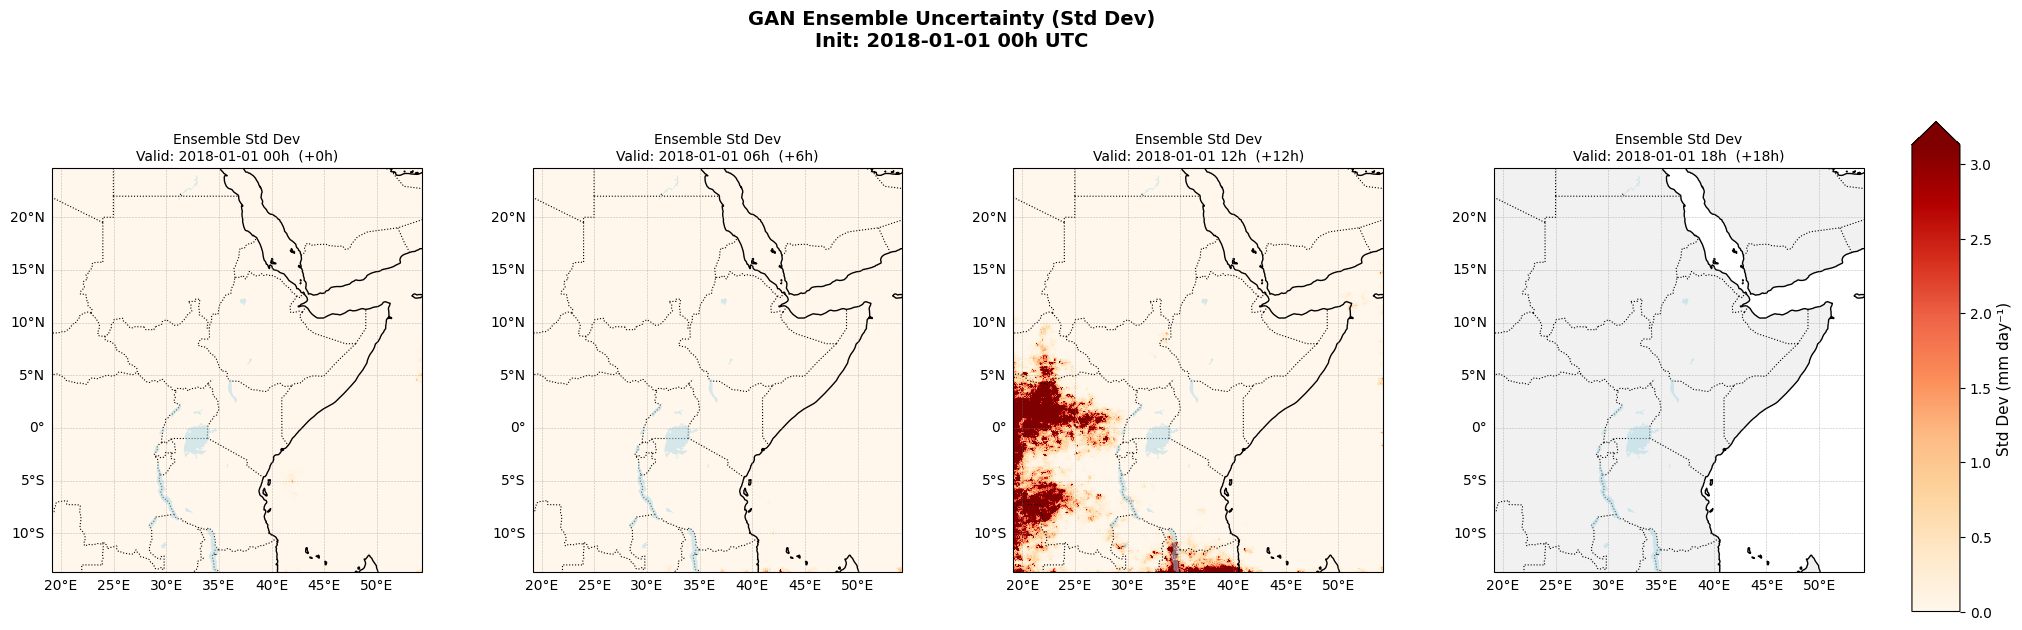

Std Dev figure saved.


In [28]:
"""
Cartopy visualization script for GAN forecast outputs (.npy)
=============================================================
Expected files (produced by forecast_gfs_save.py):
  - precipitation_YYYYMMDD.npy  -> (members, valid_times, lat, lon)
  - latitude.npy                -> (n_lat,)
  - longitude.npy               -> (n_lon,)
  - valid_times_YYYYMMDD.npy    -> (n_valid_times,)  lead hours from init
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize     # linear scale — numeric ticks
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta

# =============================================================================
# CONFIGURATION — edit these parameters as needed
# =============================================================================
OUTPUT_FOLDER = "/content/output_test/test/2018"
DATE_STR      = "20180101"
INIT_DATE     = datetime(2018, 1, 1)

MEMBER        = -1      # -1 -> ensemble mean, 0..N-1 -> specific member
SINGLE_TIME   = None    # None -> average over all time steps
                        # int  -> single time step (e.g. 0=00h, 1=06h)

CMAP  = "YlGnBu"
VMIN  = 0.0    # mm/day
VMAX  = 20.0   # mm/day — will be auto-set from data if values exceed this

# =============================================================================
# LOAD DATA
# =============================================================================
precip      = np.load(os.path.join(OUTPUT_FOLDER, f"precipitation_{DATE_STR}.npy"))
latitude    = np.load(os.path.join(OUTPUT_FOLDER, "latitude.npy"))
longitude   = np.load(os.path.join(OUTPUT_FOLDER, "longitude.npy"))
valid_times = np.load(os.path.join(OUTPUT_FOLDER, f"valid_times_{DATE_STR}.npy"))

print(f"precip shape : {precip.shape} (members, times, lat, lon)")
print(
    f"precip raw   : "
    f"min={np.nanmin(precip):.4f}, "
    f"max={np.nanmax(precip):.4f} mm/h"
)

# =============================================================================
# CONVERSION mm/h -> mm/day (x24)
# =============================================================================
precip_daily = precip    # (members, times, lat, lon) in mm/day
print(f"precip daily : min={np.nanmin(precip_daily):.4f}, max={np.nanmax(precip_daily):.4f} mm/day")

# Auto-adjust VMAX to data if needed
data_max = float(np.nanpercentile(precip, 99))
VMAX     = max(VMAX, data_max)
print(f"VMAX used    : {VMAX:.2f} mm/day")

# Linear normalisation — numeric ticks like the input field plot
norm = Normalize(vmin=VMIN, vmax=VMAX)

# # =============================================================================
# # PLOT 1 — MEAN OVER MEMBERS AND TIME STEPS (reference style)
# # =============================================================================
# field_mean = precip_daily.mean(axis=0).mean(axis=0)   # (lat, lon)
# print(f"field_mean   : min={field_mean.min():.4f}, max={field_mean.max():.4f} mm/day")

# fig = plt.figure(figsize=(10, 12))
# ax  = plt.axes(projection=ccrs.PlateCarree())

# ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()],
#               crs=ccrs.PlateCarree())
# ax.coastlines(resolution='50m', linewidth=1)
# ax.add_feature(cfeature.BORDERS,  linestyle=':', linewidth=0.8)
# ax.add_feature(cfeature.LAND,     facecolor='lightgray', alpha=0.3)
# ax.add_feature(cfeature.OCEAN,    facecolor='lightblue', alpha=0.2)
# ax.add_feature(cfeature.LAKES,    facecolor='lightblue', alpha=0.5)
# ax.add_feature(cfeature.RIVERS,   edgecolor='blue', linewidth=0.3)

# gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
#                   alpha=0.5, linestyle='--')
# gl.top_labels   = False
# gl.right_labels = False

# c = ax.pcolormesh(
#     longitude, latitude, field_mean,
#     transform=ccrs.PlateCarree(),
#     cmap=CMAP,
#     norm=norm,          # linear — numeric ticks (0, 5, 10, 15, 20 ...)
#     shading="auto"
# )
# cb = plt.colorbar(c, ax=ax, fraction=0.03, pad=0.04)
# cb.set_label("Precipitation (mm day⁻¹)", fontsize=11)

# ax.set_title(
#     f"GAN Downscaled Precipitation — Ensemble & Time Mean\n"
#     f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC  "
#     f"({precip.shape[0]} members, {precip.shape[1]} time steps)",
#     fontsize=12
# )
# plt.savefig(
#     os.path.join(OUTPUT_FOLDER, f"GAN_mean_{DATE_STR}.png"),
#     dpi=150, bbox_inches="tight"
# )
# plt.show()
# print("Mean map saved.")


# =============================================================================
# PLOT 2 — ONE PANEL PER TIME STEP (ensemble mean only)
# =============================================================================
if SINGLE_TIME is not None:
    time_indices = [SINGLE_TIME]
else:
    time_indices = list(range(len(valid_times)))

if MEMBER == -1:
    data_to_plot = precip_daily.mean(axis=0)   # (times, lat, lon)
    member_label = "Ensemble mean"
else:
    data_to_plot = precip_daily[MEMBER]        # (times, lat, lon)
    member_label = f"Member {MEMBER + 1}"

n_plots = len(time_indices)
ncols   = min(4, n_plots)
nrows   = (n_plots + ncols - 1) // ncols

fig2, axes2 = plt.subplots(
    nrows, ncols,
    figsize=(6 * ncols, 7 * nrows),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
if n_plots == 1:
    axes2 = np.array([[axes2]])
axes2_flat = axes2.flatten()

for plot_idx, time_idx in enumerate(time_indices):

    ax        = axes2_flat[plot_idx]
    lead_hour = int(valid_times[time_idx])
    valid_dt  = INIT_DATE + timedelta(hours=lead_hour)
    field     = data_to_plot[time_idx]   # (lat, lon)

    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                  crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
    ax.add_feature(cfeature.LAND,    facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.LAKES,   facecolor='lightblue', alpha=0.5)
    ax.add_feature(cfeature.RIVERS,  edgecolor='blue', linewidth=0.3)

    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
                      alpha=0.5, linestyle='--')
    gl.top_labels   = False
    gl.right_labels = False

    c2 = ax.pcolormesh(
        longitude, latitude, field,
        transform=ccrs.PlateCarree(),
        cmap=CMAP,
        norm=norm,
        shading="auto"
    )
    ax.set_title(
        f"{member_label}\n"
        f"Valid: {valid_dt.strftime('%Y-%m-%d %Hh')}  (+{lead_hour}h)",
        fontsize=10
    )

for ax in axes2_flat[n_plots:]:
    ax.set_visible(False)

fig2.subplots_adjust(right=0.88, hspace=0.4, wspace=0.3)
cbar_ax = fig2.add_axes([0.90, 0.15, 0.02, 0.7])
cb2     = fig2.colorbar(c2, cax=cbar_ax, extend="max")
cb2.set_label("Precipitation (mm day⁻¹)", fontsize=11)
fig2.suptitle(
    f"GAN Downscaled Precipitation — {member_label}\n"
    f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC",
    fontsize=14, fontweight="bold", y=1.01
)
plt.savefig(
    os.path.join(OUTPUT_FOLDER,
                 f"GAN_timesteps_{DATE_STR}_{member_label.replace(' ', '_')}.png"),
    dpi=150, bbox_inches="tight"
)
plt.show()
print("Time steps figure saved.")


# =============================================================================
# PLOT 3 — ENSEMBLE UNCERTAINTY (STD DEV) in mm/day
# =============================================================================
if precip.shape[0] > 1:

    std_data    = precip_daily.std(axis=0)   # (times, lat, lon)
    nonzero_std = std_data[std_data > 0]
    vmax_std    = float(np.nanpercentile(nonzero_std, 99)) if len(nonzero_std) > 0 else 1.0
    print(f"\nvmax_std (p99) : {vmax_std:.4f} mm/day")

    fig3, axes3 = plt.subplots(
        nrows, ncols,
        figsize=(6 * ncols, 7 * nrows),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )
    if n_plots == 1:
        axes3 = np.array([[axes3]])
    axes3_flat = axes3.flatten()

    for plot_idx, time_idx in enumerate(time_indices):

        ax        = axes3_flat[plot_idx]
        lead_hour = int(valid_times[time_idx])
        valid_dt  = INIT_DATE + timedelta(hours=lead_hour)
        field_std = std_data[time_idx]

        ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                      crs=ccrs.PlateCarree())
        ax.coastlines(resolution='50m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
        ax.add_feature(cfeature.LAND,    facecolor='lightgray', alpha=0.3)
        ax.add_feature(cfeature.LAKES,   facecolor='lightblue', alpha=0.5)

        gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
                          alpha=0.5, linestyle='--')
        gl.top_labels   = False
        gl.right_labels = False

        c3 = ax.pcolormesh(
            longitude, latitude, field_std,
            transform=ccrs.PlateCarree(),
            cmap="OrRd",
            vmin=0,
            vmax=vmax_std,
            shading="auto"
        )
        ax.set_title(
            f"Ensemble Std Dev\n"
            f"Valid: {valid_dt.strftime('%Y-%m-%d %Hh')}  (+{lead_hour}h)",
            fontsize=10
        )

    for ax in axes3_flat[n_plots:]:
        ax.set_visible(False)

    fig3.subplots_adjust(right=0.88, hspace=0.4, wspace=0.3)
    cbar_ax3 = fig3.add_axes([0.90, 0.15, 0.02, 0.7])
    cb3      = fig3.colorbar(c3, cax=cbar_ax3, extend="max")
    cb3.set_label("Std Dev (mm day⁻¹)", fontsize=11)
    fig3.suptitle(
        f"GAN Ensemble Uncertainty (Std Dev)\n"
        f"Init: {INIT_DATE.strftime('%Y-%m-%d 00h')} UTC",
        fontsize=14, fontweight="bold", y=1.01
    )
    plt.savefig(
        os.path.join(OUTPUT_FOLDER, f"GAN_std_{DATE_STR}.png"),
        dpi=150, bbox_inches="tight"
    )
    plt.show()
    print("Std Dev figure saved.")

#IMERG precipitation

File exists. Size: 0.11 MB
Default engine failed, trying engine='h5netcdf'...
<xarray.Dataset> Size: 544kB
Dimensions:        (latitude: 384, longitude: 352, time: 1)
Coordinates:
  * latitude       (latitude) float32 2kB -13.65 -13.55 -13.45 ... 24.55 24.65
  * longitude      (longitude) float32 1kB 19.15 19.25 19.35 ... 54.15 54.25
  * time           (time) datetime64[ns] 8B 2018-01-01
Data variables:
    precipitation  (latitude, longitude) float32 541kB ...
Attributes:
    description:  6h average of IMERG V07 rainfall data in the ICPAC region


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


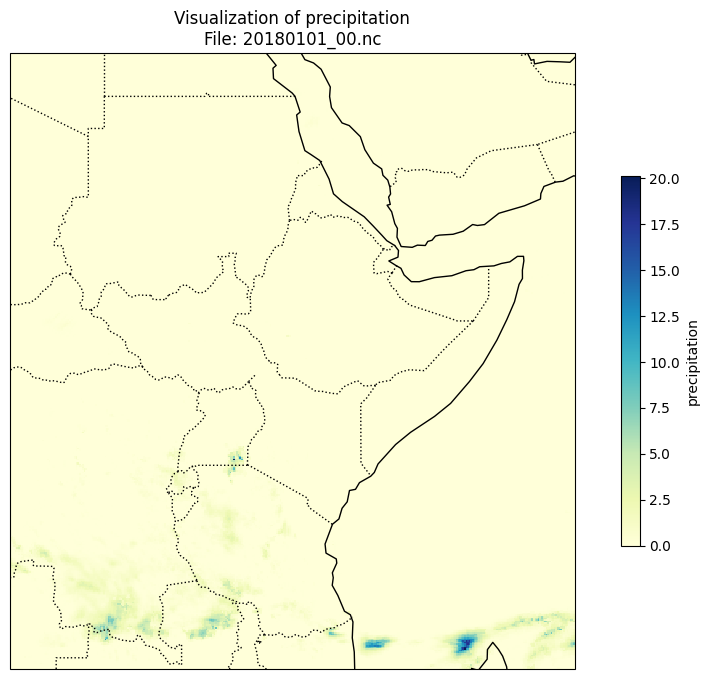

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

# Path to the file
file_path = '/content/20180101_00.nc'

# Check if file exists and its size
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
    if size < 0.01:
        print("Warning: The file seems too small and might be corrupted.")
else:
    print(f"Error: File {file_path} not found.")

try:
    # Try opening with default engine, falling back to h5netcdf if needed
    try:
        ds = xr.open_dataset(file_path)
    except Exception:
        print("Default engine failed, trying engine='h5netcdf'...")
        ds = xr.open_dataset(file_path, engine='h5netcdf')

    print(ds)

    # Setup the figure and axis
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add geographic features
    ax.coastlines(resolution='110m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)

    # Plotting
    var_name = 'precipitation' if 'precipitation' in ds.data_vars else list(ds.data_vars)[0]
    data = ds[var_name]

    # Handle dimensions (selecting first member/time if present)
    if 'member' in data.dims:
        data = data.isel(member=0)
    if 'time' in data.dims:
        data = data.isel(time=0)
    elif 'valid_time' in data.dims:
        data = data.isel(valid_time=0)

    im = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='YlGnBu',
                   add_colorbar=True, cbar_kwargs={'shrink': 0.6, 'label': f'{var_name}'})

    ax.set_title(f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}")
    plt.show()
except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    print("If the file is from a drive mount, ensure the path is correct and the drive is accessible.")

File exists. Size: 0.09 MB
Default engine failed, trying engine='h5netcdf'...
<xarray.Dataset> Size: 544kB
Dimensions:        (latitude: 384, longitude: 352, time: 1)
Coordinates:
  * latitude       (latitude) float32 2kB -13.65 -13.55 -13.45 ... 24.55 24.65
  * longitude      (longitude) float32 1kB 19.15 19.25 19.35 ... 54.15 54.25
  * time           (time) datetime64[ns] 8B 2018-01-01T06:00:00
Data variables:
    precipitation  (latitude, longitude) float32 541kB ...
Attributes:
    description:  6h average of IMERG V07 rainfall data in the ICPAC region


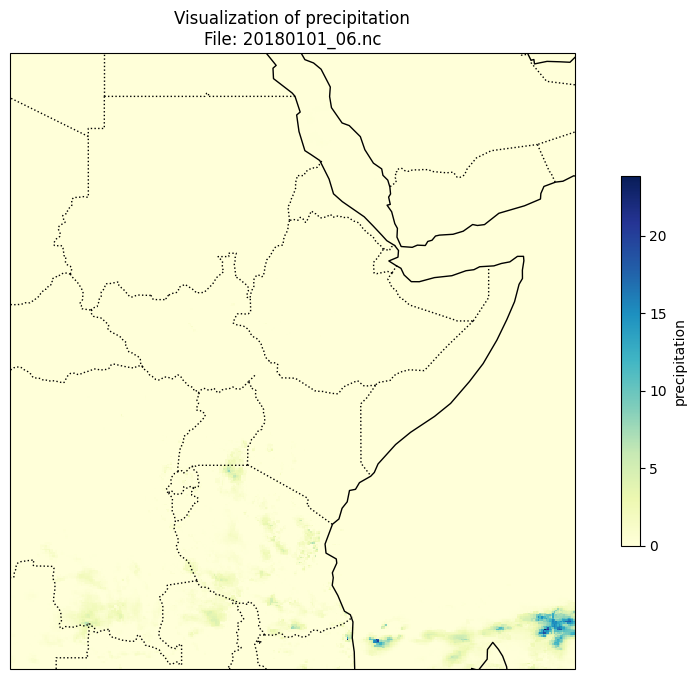

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

# Path to the file
file_path = '/content/20180101_06.nc'

# Check if file exists and its size
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
    if size < 0.01:
        print("Warning: The file seems too small and might be corrupted.")
else:
    print(f"Error: File {file_path} not found.")

try:
    # Try opening with default engine, falling back to h5netcdf if needed
    try:
        ds = xr.open_dataset(file_path)
    except Exception:
        print("Default engine failed, trying engine='h5netcdf'...")
        ds = xr.open_dataset(file_path, engine='h5netcdf')

    print(ds)

    # Setup the figure and axis
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add geographic features
    ax.coastlines(resolution='110m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)

    # Plotting
    var_name = 'precipitation' if 'precipitation' in ds.data_vars else list(ds.data_vars)[0]
    data = ds[var_name]

    # Handle dimensions (selecting first member/time if present)
    if 'member' in data.dims:
        data = data.isel(member=0)
    if 'time' in data.dims:
        data = data.isel(time=0)
    elif 'valid_time' in data.dims:
        data = data.isel(valid_time=0)

    im = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='YlGnBu',
                   add_colorbar=True, cbar_kwargs={'shrink': 0.6, 'label': f'{var_name}'})

    ax.set_title(f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}")
    plt.show()
except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    print("If the file is from a drive mount, ensure the path is correct and the drive is accessible.")

File exists. Size: 0.09 MB
Default engine failed, trying engine='h5netcdf'...
<xarray.Dataset> Size: 544kB
Dimensions:        (latitude: 384, longitude: 352, time: 1)
Coordinates:
  * latitude       (latitude) float32 2kB -13.65 -13.55 -13.45 ... 24.55 24.65
  * longitude      (longitude) float32 1kB 19.15 19.25 19.35 ... 54.15 54.25
  * time           (time) datetime64[ns] 8B 2018-01-01T12:00:00
Data variables:
    precipitation  (latitude, longitude) float32 541kB ...
Attributes:
    description:  6h average of IMERG V07 rainfall data in the ICPAC region


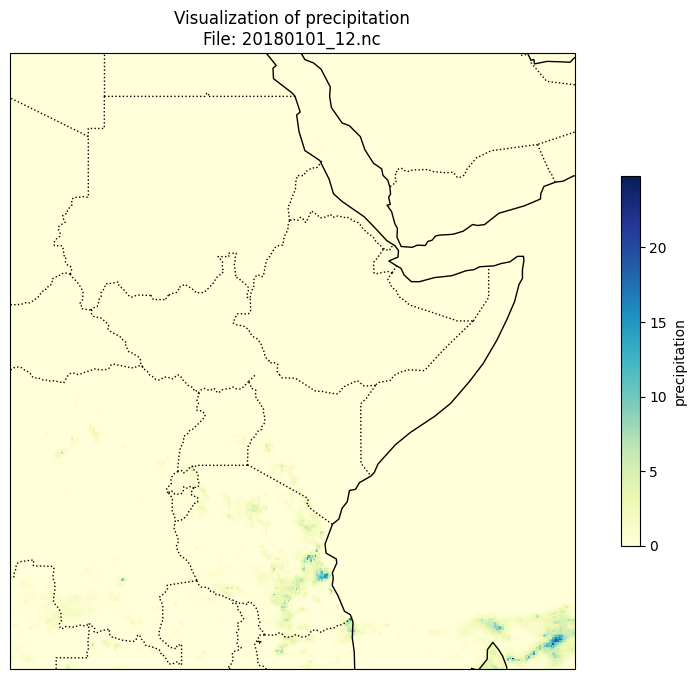

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

# Path to the file
file_path = '/content/20180101_12.nc'

# Check if file exists and its size
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
    if size < 0.01:
        print("Warning: The file seems too small and might be corrupted.")
else:
    print(f"Error: File {file_path} not found.")

try:
    # Try opening with default engine, falling back to h5netcdf if needed
    try:
        ds = xr.open_dataset(file_path)
    except Exception:
        print("Default engine failed, trying engine='h5netcdf'...")
        ds = xr.open_dataset(file_path, engine='h5netcdf')

    print(ds)

    # Setup the figure and axis
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add geographic features
    ax.coastlines(resolution='110m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)

    # Plotting
    var_name = 'precipitation' if 'precipitation' in ds.data_vars else list(ds.data_vars)[0]
    data = ds[var_name]

    # Handle dimensions (selecting first member/time if present)
    if 'member' in data.dims:
        data = data.isel(member=0)
    if 'time' in data.dims:
        data = data.isel(time=0)
    elif 'valid_time' in data.dims:
        data = data.isel(valid_time=0)

    im = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='YlGnBu',
                   add_colorbar=True, cbar_kwargs={'shrink': 0.6, 'label': f'{var_name}'})

    ax.set_title(f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}")
    plt.show()
except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    print("If the file is from a drive mount, ensure the path is correct and the drive is accessible.")

File exists. Size: 0.08 MB
Default engine failed, trying engine='h5netcdf'...
<xarray.Dataset> Size: 544kB
Dimensions:        (latitude: 384, longitude: 352, time: 1)
Coordinates:
  * latitude       (latitude) float32 2kB -13.65 -13.55 -13.45 ... 24.55 24.65
  * longitude      (longitude) float32 1kB 19.15 19.25 19.35 ... 54.15 54.25
  * time           (time) datetime64[ns] 8B 2018-01-01T18:00:00
Data variables:
    precipitation  (latitude, longitude) float32 541kB ...
Attributes:
    description:  6h average of IMERG V07 rainfall data in the ICPAC region


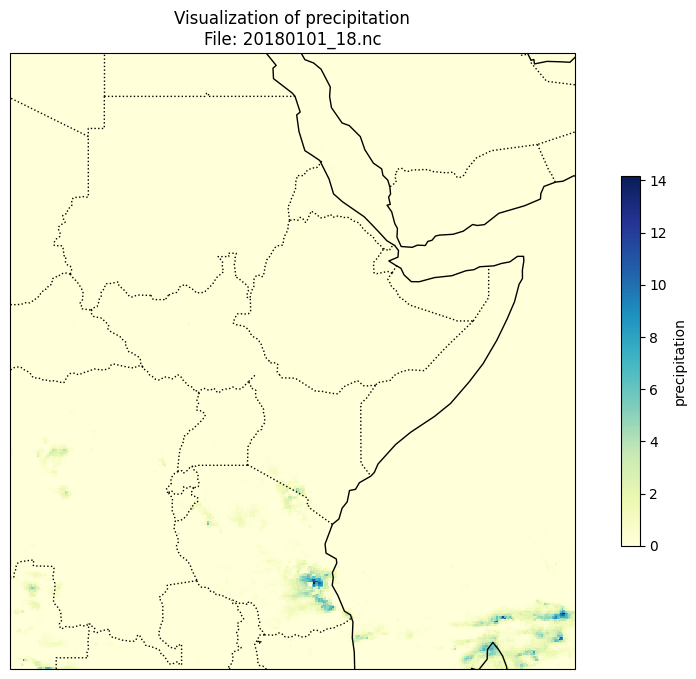

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

# Path to the file
file_path = '/content/20180101_18.nc'

# Check if file exists and its size
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
    if size < 0.01:
        print("Warning: The file seems too small and might be corrupted.")
else:
    print(f"Error: File {file_path} not found.")

try:
    # Try opening with default engine, falling back to h5netcdf if needed
    try:
        ds = xr.open_dataset(file_path)
    except Exception:
        print("Default engine failed, trying engine='h5netcdf'...")
        ds = xr.open_dataset(file_path, engine='h5netcdf')

    print(ds)

    # Setup the figure and axis
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add geographic features
    ax.coastlines(resolution='110m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)

    # Plotting
    var_name = 'precipitation' if 'precipitation' in ds.data_vars else list(ds.data_vars)[0]
    data = ds[var_name]

    # Handle dimensions (selecting first member/time if present)
    if 'member' in data.dims:
        data = data.isel(member=0)
    if 'time' in data.dims:
        data = data.isel(time=0)
    elif 'valid_time' in data.dims:
        data = data.isel(valid_time=0)

    im = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='YlGnBu',
                   add_colorbar=True, cbar_kwargs={'shrink': 0.6, 'label': f'{var_name}'})

    ax.set_title(f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}")
    plt.show()
except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    print("If the file is from a drive mount, ensure the path is correct and the drive is accessible.")

# NGCM Precipiation prediction

File exists. Size: 0.04 MB
<xarray.Dataset> Size: 43kB
Dimensions:                        (time: 37, surface: 1, longitude: 16,
                                    latitude: 18)
Coordinates:
  * time                           (time) datetime64[ns] 296B 2001-01-01 ... ...
  * surface                        (surface) int32 4B 1
  * longitude                      (longitude) float64 128B 16.88 ... 59.06
  * latitude                       (latitude) float64 144B -18.14 ... 29.3
    prediction_timedelta           int32 4B ...
    date                           datetime64[ns] 8B ...
Data variables:
    precipitation_cumulative_mean  (time, surface, longitude, latitude) float32 43kB ...

Variable   : precipitation_cumulative_mean
Dimensions : ('time', 'surface', 'longitude', 'latitude')
Shape      : (37, 1, 16, 18)
Lat range  : -18.14 → 29.30
Lon range  : 16.88 → 59.06
Plotting shape: (18, 16)  (lat x lon)


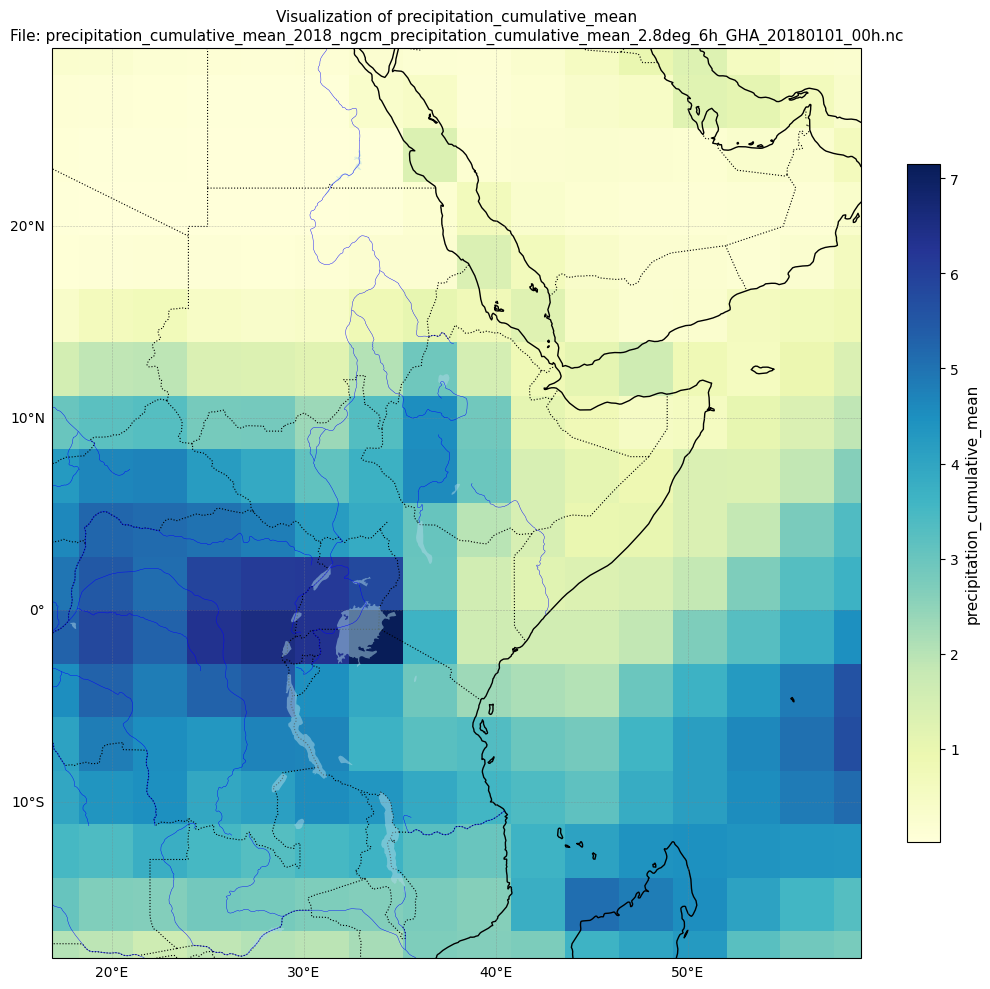

In [19]:

# Path to the file
file_path = '/content/drive/MyDrive/AIMS_project_data/NGCM/precipitation_cumulative_mean/2018/precipitation_cumulative_mean_2018_ngcm_precipitation_cumulative_mean_2.8deg_6h_GHA_20180101_00h.nc'

# Check file
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
else:
    print(f"Error: File not found: {file_path}")

try:
    ds = xr.open_dataset(file_path, decode_timedelta=False)
    print(ds)

    # Get variable name
    var_name = list(ds.data_vars)[0]
    data = ds[var_name]

    print(f"\nVariable   : {var_name}")
    print(f"Dimensions : {data.dims}")
    print(f"Shape      : {data.shape}")

    # Detect lat/lon dimension names
    lat_dim = "latitude"  if "latitude"  in ds.coords else "lat"
    lon_dim = "longitude" if "longitude" in ds.coords else "lon"

    lats = ds[lat_dim].values
    lons = ds[lon_dim].values
    print(f"Lat range  : {lats.min():.2f} → {lats.max():.2f}")
    print(f"Lon range  : {lons.min():.2f} → {lons.max():.2f}")

    # Select first time step if time dimension exists
    if 'time' in data.dims:
        data = data.isel(time=0)
    if 'surface' in data.dims:
        data = data.squeeze('surface')

    data_np = data.values/6

    # Transpose to (lat, lon) if needed
    if data_np.shape == (len(lons), len(lats)):
        data_np = data_np.T
    print(f"Plotting shape: {data_np.shape}  (lat x lon)")

    # ==========================================================================
    # PLOT — ICPAC region with correct extent
    # ==========================================================================
    fig = plt.figure(figsize=(12, 10))
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # Fix extent to ICPAC region
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()],
                  crs=ccrs.PlateCarree())

    # Geographic features
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.BORDERS,  linestyle=':', linewidth=0.8)
    ax.add_feature(cfeature.LAND,     facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN,    facecolor='lightblue', alpha=0.2)
    ax.add_feature(cfeature.LAKES,    facecolor='lightblue', alpha=0.5)
    ax.add_feature(cfeature.RIVERS,   edgecolor='blue', linewidth=0.3)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
                      alpha=0.5, linestyle='--')
    gl.top_labels   = False
    gl.right_labels = False

    # Plot data
    im = ax.pcolormesh(
        lons, lats, data_np,
        transform=ccrs.PlateCarree(),
        cmap='YlGnBu',
        shading='auto'
    )

    cb = plt.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
    cb.set_label(f"{var_name}", fontsize=11)

    ax.set_title(
        f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}",
        fontsize=11
    )
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    import traceback
    traceback.print_exc()

File exists. Size: 0.04 MB
<xarray.Dataset> Size: 43kB
Dimensions:                        (time: 37, surface: 1, longitude: 16,
                                    latitude: 18)
Coordinates:
  * time                           (time) datetime64[ns] 296B 2001-01-01 ... ...
  * surface                        (surface) int32 4B 1
  * longitude                      (longitude) float64 128B 16.88 ... 59.06
  * latitude                       (latitude) float64 144B -18.14 ... 29.3
    prediction_timedelta           int32 4B ...
    date                           datetime64[ns] 8B ...
Data variables:
    precipitation_cumulative_mean  (time, surface, longitude, latitude) float32 43kB ...

Variable   : precipitation_cumulative_mean
Dimensions : ('time', 'surface', 'longitude', 'latitude')
Shape      : (37, 1, 16, 18)
Lat range  : -18.14 → 29.30
Lon range  : 16.88 → 59.06
Plotting shape: (18, 16)  (lat x lon)


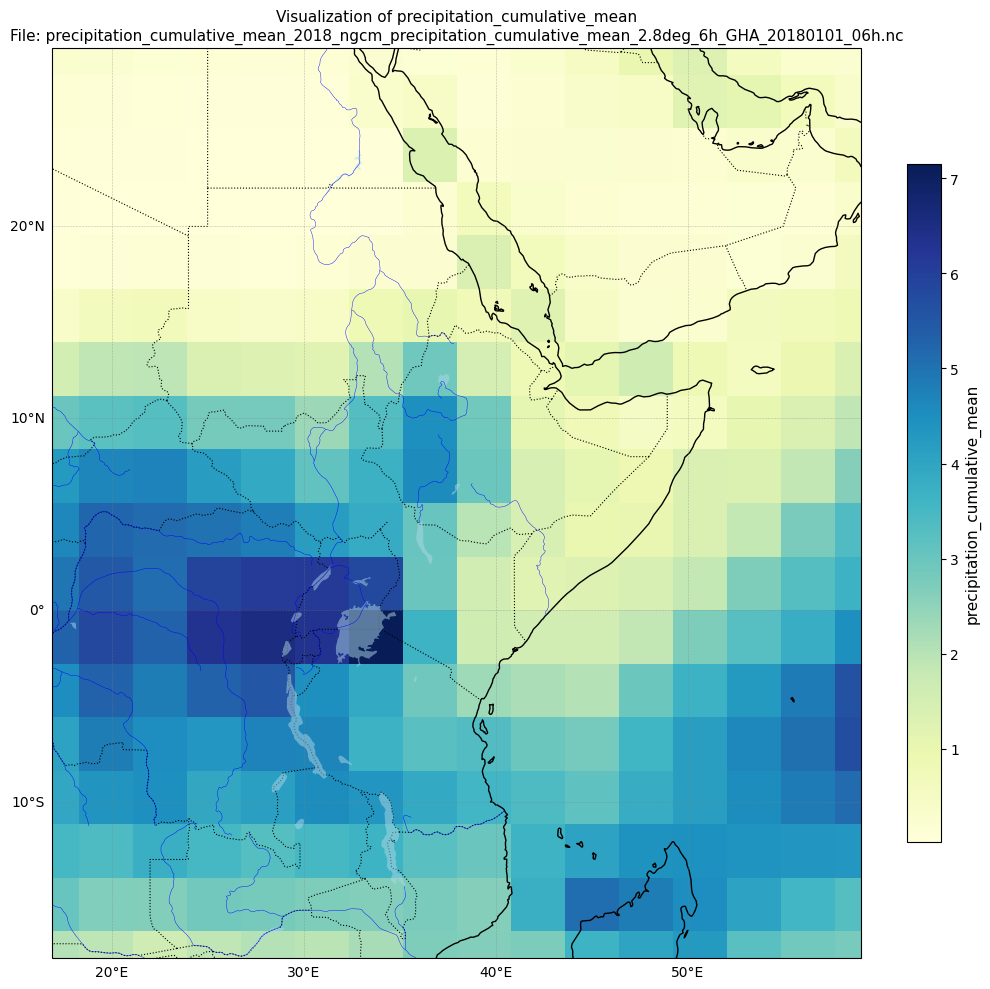

In [20]:
# Path to the file
file_path = '/content/drive/MyDrive/AIMS_project_data/NGCM/precipitation_cumulative_mean/2018/precipitation_cumulative_mean_2018_ngcm_precipitation_cumulative_mean_2.8deg_6h_GHA_20180101_06h.nc'

# Check file
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
else:
    print(f"Error: File not found: {file_path}")

try:
    ds = xr.open_dataset(file_path, decode_timedelta=False)
    print(ds)

    # Get variable name
    var_name = list(ds.data_vars)[0]
    data = ds[var_name]

    print(f"\nVariable   : {var_name}")
    print(f"Dimensions : {data.dims}")
    print(f"Shape      : {data.shape}")

    # Detect lat/lon dimension names
    lat_dim = "latitude"  if "latitude"  in ds.coords else "lat"
    lon_dim = "longitude" if "longitude" in ds.coords else "lon"

    lats = ds[lat_dim].values
    lons = ds[lon_dim].values
    print(f"Lat range  : {lats.min():.2f} → {lats.max():.2f}")
    print(f"Lon range  : {lons.min():.2f} → {lons.max():.2f}")

    # Select first time step if time dimension exists
    if 'time' in data.dims:
        data = data.isel(time=0)
    if 'surface' in data.dims:
        data = data.squeeze('surface')

    data_np = data.values/6

    # Transpose to (lat, lon) if needed
    if data_np.shape == (len(lons), len(lats)):
        data_np = data_np.T
    print(f"Plotting shape: {data_np.shape}  (lat x lon)")

    # ==========================================================================
    # PLOT — ICPAC region with correct extent
    # ==========================================================================
    fig = plt.figure(figsize=(12, 10))
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # Fix extent to ICPAC region
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()],
                  crs=ccrs.PlateCarree())

    # Geographic features
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.BORDERS,  linestyle=':', linewidth=0.8)
    ax.add_feature(cfeature.LAND,     facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN,    facecolor='lightblue', alpha=0.2)
    ax.add_feature(cfeature.LAKES,    facecolor='lightblue', alpha=0.5)
    ax.add_feature(cfeature.RIVERS,   edgecolor='blue', linewidth=0.3)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
                      alpha=0.5, linestyle='--')
    gl.top_labels   = False
    gl.right_labels = False

    # Plot data
    im = ax.pcolormesh(
        lons, lats, data_np,
        transform=ccrs.PlateCarree(),
        cmap='YlGnBu',
        shading='auto'
    )

    cb = plt.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
    cb.set_label(f"{var_name}", fontsize=11)

    ax.set_title(
        f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}",
        fontsize=11
    )
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    import traceback
    traceback.print_exc()

File exists. Size: 0.04 MB
<xarray.Dataset> Size: 43kB
Dimensions:                        (time: 37, surface: 1, longitude: 16,
                                    latitude: 18)
Coordinates:
  * time                           (time) datetime64[ns] 296B 2001-01-01 ... ...
  * surface                        (surface) int32 4B 1
  * longitude                      (longitude) float64 128B 16.88 ... 59.06
  * latitude                       (latitude) float64 144B -18.14 ... 29.3
    prediction_timedelta           int32 4B ...
    date                           datetime64[ns] 8B ...
Data variables:
    precipitation_cumulative_mean  (time, surface, longitude, latitude) float32 43kB ...

Variable   : precipitation_cumulative_mean
Dimensions : ('time', 'surface', 'longitude', 'latitude')
Shape      : (37, 1, 16, 18)
Lat range  : -18.14 → 29.30
Lon range  : 16.88 → 59.06
Plotting shape: (18, 16)  (lat x lon)


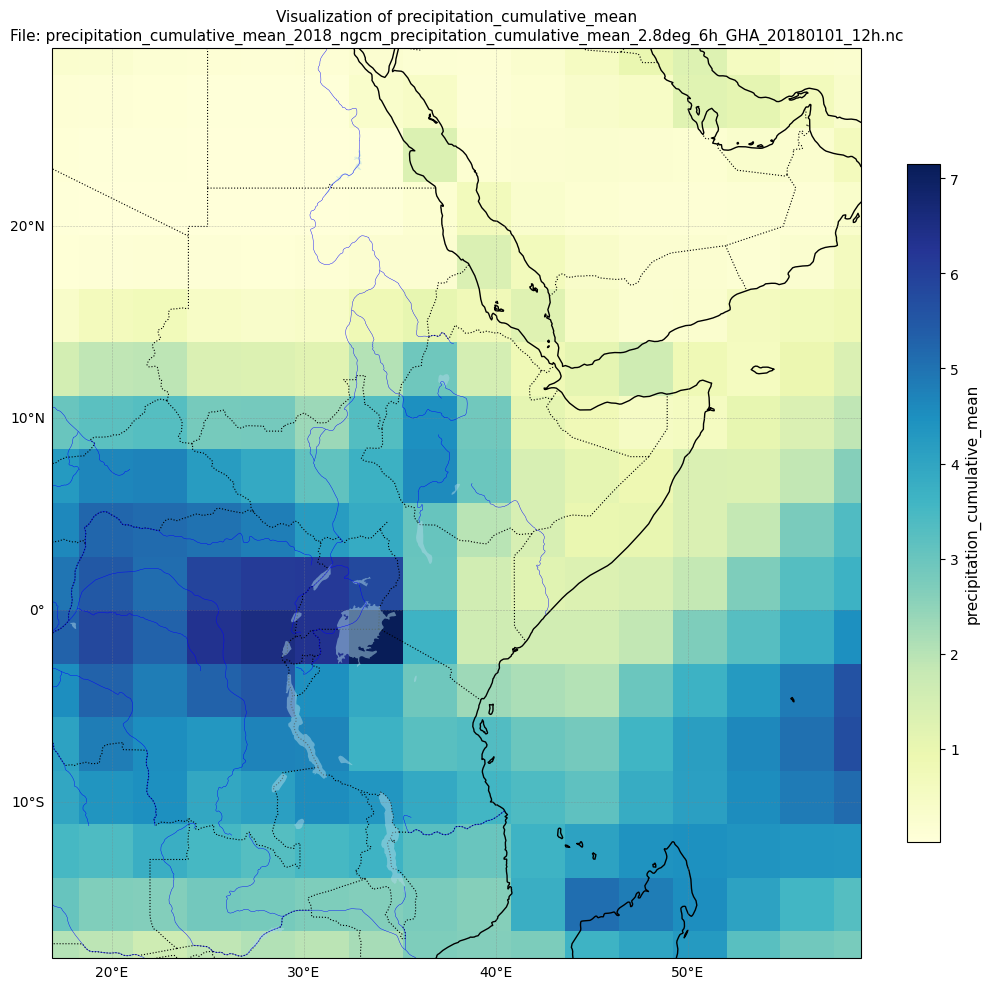

In [21]:
# Path to the file
file_path = '/content/drive/MyDrive/AIMS_project_data/NGCM/precipitation_cumulative_mean/2018/precipitation_cumulative_mean_2018_ngcm_precipitation_cumulative_mean_2.8deg_6h_GHA_20180101_12h.nc'

# Check file
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
else:
    print(f"Error: File not found: {file_path}")

try:
    ds = xr.open_dataset(file_path, decode_timedelta=False)
    print(ds)

    # Get variable name
    var_name = list(ds.data_vars)[0]
    data = ds[var_name]

    print(f"\nVariable   : {var_name}")
    print(f"Dimensions : {data.dims}")
    print(f"Shape      : {data.shape}")

    # Detect lat/lon dimension names
    lat_dim = "latitude"  if "latitude"  in ds.coords else "lat"
    lon_dim = "longitude" if "longitude" in ds.coords else "lon"

    lats = ds[lat_dim].values
    lons = ds[lon_dim].values
    print(f"Lat range  : {lats.min():.2f} → {lats.max():.2f}")
    print(f"Lon range  : {lons.min():.2f} → {lons.max():.2f}")

    # Select first time step if time dimension exists
    if 'time' in data.dims:
        data = data.isel(time=0)
    if 'surface' in data.dims:
        data = data.squeeze('surface')

    data_np = data.values/6

    # Transpose to (lat, lon) if needed
    if data_np.shape == (len(lons), len(lats)):
        data_np = data_np.T
    print(f"Plotting shape: {data_np.shape}  (lat x lon)")

    # ==========================================================================
    # PLOT — ICPAC region with correct extent
    # ==========================================================================
    fig = plt.figure(figsize=(12, 10))
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # Fix extent to ICPAC region
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()],
                  crs=ccrs.PlateCarree())

    # Geographic features
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.BORDERS,  linestyle=':', linewidth=0.8)
    ax.add_feature(cfeature.LAND,     facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN,    facecolor='lightblue', alpha=0.2)
    ax.add_feature(cfeature.LAKES,    facecolor='lightblue', alpha=0.5)
    ax.add_feature(cfeature.RIVERS,   edgecolor='blue', linewidth=0.3)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
                      alpha=0.5, linestyle='--')
    gl.top_labels   = False
    gl.right_labels = False

    # Plot data
    im = ax.pcolormesh(
        lons, lats, data_np,
        transform=ccrs.PlateCarree(),
        cmap='YlGnBu',
        shading='auto'
    )

    cb = plt.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
    cb.set_label(f"{var_name}", fontsize=11)

    ax.set_title(
        f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}",
        fontsize=11
    )
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    import traceback
    traceback.print_exc()

File exists. Size: 0.04 MB
<xarray.Dataset> Size: 43kB
Dimensions:                        (time: 37, surface: 1, longitude: 16,
                                    latitude: 18)
Coordinates:
  * time                           (time) datetime64[ns] 296B 2001-01-01 ... ...
  * surface                        (surface) int32 4B 1
  * longitude                      (longitude) float64 128B 16.88 ... 59.06
  * latitude                       (latitude) float64 144B -18.14 ... 29.3
    prediction_timedelta           int32 4B ...
    date                           datetime64[ns] 8B ...
Data variables:
    precipitation_cumulative_mean  (time, surface, longitude, latitude) float32 43kB ...

Variable   : precipitation_cumulative_mean
Dimensions : ('time', 'surface', 'longitude', 'latitude')
Shape      : (37, 1, 16, 18)
Lat range  : -18.14 → 29.30
Lon range  : 16.88 → 59.06
Plotting shape: (18, 16)  (lat x lon)


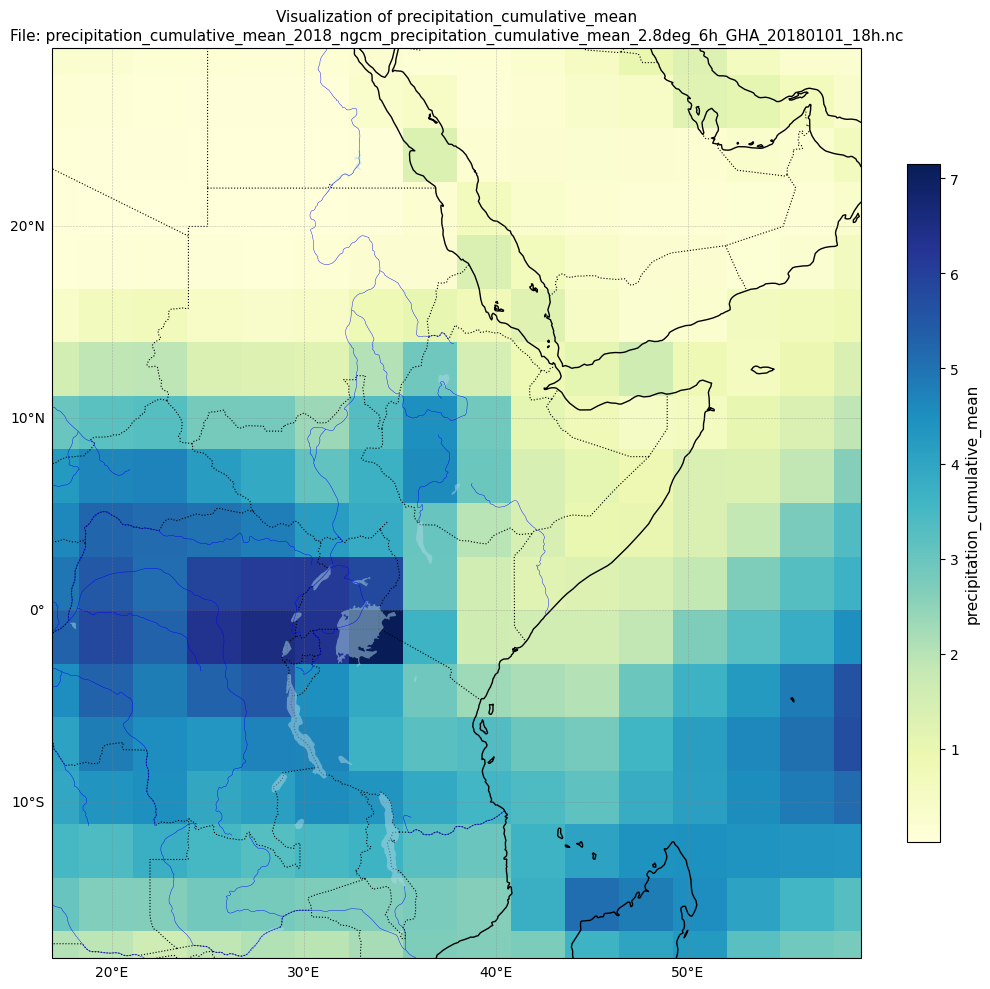

In [22]:
# Path to the file
file_path = '/content/drive/MyDrive/AIMS_project_data/NGCM/precipitation_cumulative_mean/2018/precipitation_cumulative_mean_2018_ngcm_precipitation_cumulative_mean_2.8deg_6h_GHA_20180101_18h.nc'

# Check file
if os.path.exists(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"File exists. Size: {size:.2f} MB")
else:
    print(f"Error: File not found: {file_path}")

try:
    ds = xr.open_dataset(file_path, decode_timedelta=False)
    print(ds)

    # Get variable name
    var_name = list(ds.data_vars)[0]
    data = ds[var_name]

    print(f"\nVariable   : {var_name}")
    print(f"Dimensions : {data.dims}")
    print(f"Shape      : {data.shape}")

    # Detect lat/lon dimension names
    lat_dim = "latitude"  if "latitude"  in ds.coords else "lat"
    lon_dim = "longitude" if "longitude" in ds.coords else "lon"

    lats = ds[lat_dim].values
    lons = ds[lon_dim].values
    print(f"Lat range  : {lats.min():.2f} → {lats.max():.2f}")
    print(f"Lon range  : {lons.min():.2f} → {lons.max():.2f}")

    # Select first time step if time dimension exists
    if 'time' in data.dims:
        data = data.isel(time=0)
    if 'surface' in data.dims:
        data = data.squeeze('surface')

    data_np = data.values/6

    # Transpose to (lat, lon) if needed
    if data_np.shape == (len(lons), len(lats)):
        data_np = data_np.T
    print(f"Plotting shape: {data_np.shape}  (lat x lon)")

    # ==========================================================================
    # PLOT — ICPAC region with correct extent
    # ==========================================================================
    fig = plt.figure(figsize=(12, 10))
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # Fix extent to ICPAC region
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()],
                  crs=ccrs.PlateCarree())

    # Geographic features
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.BORDERS,  linestyle=':', linewidth=0.8)
    ax.add_feature(cfeature.LAND,     facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN,    facecolor='lightblue', alpha=0.2)
    ax.add_feature(cfeature.LAKES,    facecolor='lightblue', alpha=0.5)
    ax.add_feature(cfeature.RIVERS,   edgecolor='blue', linewidth=0.3)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray',
                      alpha=0.5, linestyle='--')
    gl.top_labels   = False
    gl.right_labels = False

    # Plot data
    im = ax.pcolormesh(
        lons, lats, data_np,
        transform=ccrs.PlateCarree(),
        cmap='YlGnBu',
        shading='auto'
    )

    cb = plt.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
    cb.set_label(f"{var_name}", fontsize=11)

    ax.set_title(
        f"Visualization of {var_name}\nFile: {os.path.basename(file_path)}",
        fontsize=11
    )
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Failed to open or plot the file: {e}")
    import traceback
    traceback.print_exc()